In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [3]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [4]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [6]:
best_k = 20
best_classifier = kmeans = KMeans(n_clusters=best_k,max_iter=10,init="random").fit(normalizedTrainFeatures)
prev_error = best_classifier.inertia_

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [7]:
def clusteringScore(data, k):
    global best_k,best_classifier,prev_error
    kmeans = KMeans(n_clusters=k, max_iter=10, init="random").fit(data)
    error = kmeans.inertia_
    if(error < prev_error):
        prev_error = error
        best_classifier = kmeans
        best_k = k
    return (k,kmeans.inertia_)

In [8]:
k_vector = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
scores = [clusteringScore(normalizedTrainFeatures, k) for k in k_vector]
for i, score in enumerate(scores):
    print("k = %3d, WSSSE = %d" %(score[0], score[1]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

k =  20, WSSSE = 258133
k =  30, WSSSE = 185447
k =  40, WSSSE = 166489
k =  50, WSSSE = 143763
k =  60, WSSSE = 134351
k =  70, WSSSE = 123572
k =  80, WSSSE = 115439
k =  90, WSSSE = 108633
k = 100, WSSSE = 102670
k = 110, WSSSE = 100523
k = 120, WSSSE = 94536
k = 130, WSSSE = 95152
k = 140, WSSSE = 88890
k = 150, WSSSE = 84608
k = 160, WSSSE = 84861


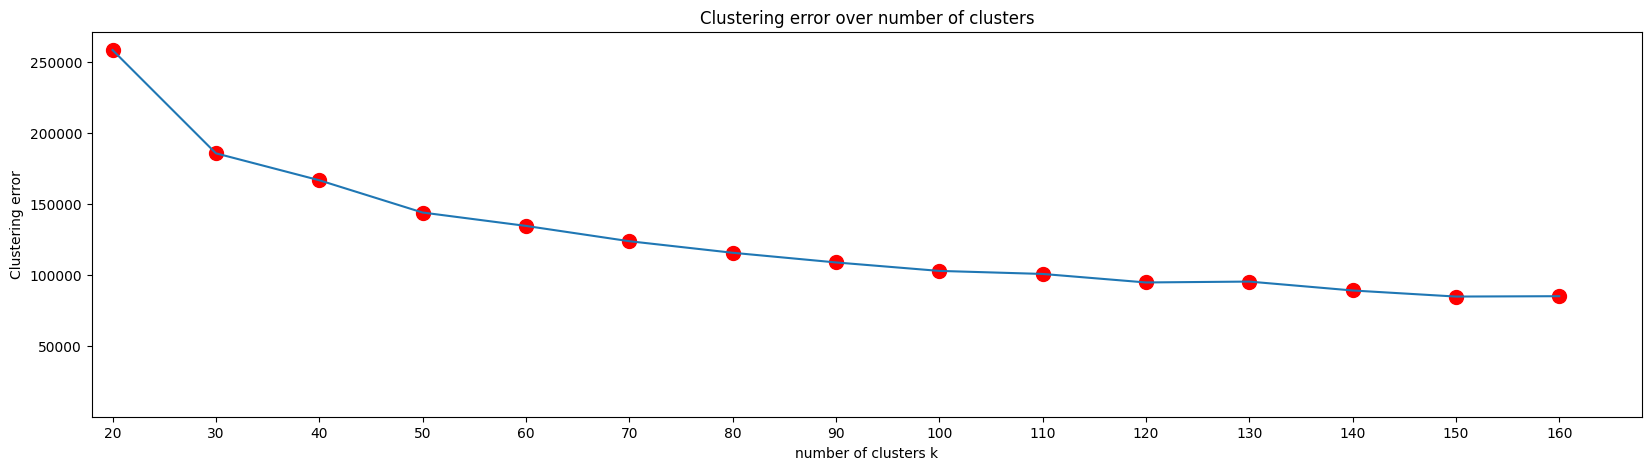

In [10]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[1] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([18, 1.05*np.max(k_vector), 0.85*np.min(scores), 1.05*np.max(scores)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering error")
plt.title("Clustering error over number of clusters")
plt.xticks(k_vector)
plt.show()

In [27]:
kmeans = best_classifier

In [16]:
sampled = normalizedTestFeatures.sample(replace=False, frac=0.01)
sampled

,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
97893,-0.279107,-0.645913,0.732294,-0.179423,-0.025008,-0.442946,2.183027,2.181073,1.794299,-0.344107,-0.127543,-0.196368,-0.308415
93866,-0.596276,-0.645913,-0.691057,-0.168808,-0.025008,0.324974,-0.592185,-0.220706,-0.147877,-0.523340,-0.127543,-0.241068,-0.248016
93837,-0.618931,-0.645913,-0.688267,-0.179423,-0.025008,-0.442946,-0.227025,-0.300600,-0.342095,-0.702573,-0.053344,0.059793,-0.187617
86462,0.423198,-0.645913,-0.685206,-0.179423,-0.025008,-0.442946,-0.665216,-0.751813,-0.730530,0.731291,0.006015,-0.068438,-0.066820
81012,-0.618931,-0.645913,1.238011,-0.168808,-0.025008,-0.442946,-0.884312,-0.977419,-0.924748,-0.523340,0.169252,-0.363190,-0.187617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96765,-0.913446,-0.645913,0.745077,-0.179423,-0.025008,-0.442946,1.525740,1.504253,1.211646,-1.061039,-0.869531,-0.530012,-0.670808
93422,-0.936101,-0.645913,0.829873,-0.179423,-0.025008,-0.442946,1.306644,1.278647,1.017428,-1.061039,-0.869531,-0.530012,-0.670808
84647,0.627093,-0.645913,-0.686196,-0.179423,-0.025008,0.324974,-0.153993,-0.625693,-0.342095,1.268990,-0.230280,-0.167169,-0.187617
90825,-0.890791,-0.645913,0.544608,-0.179423,-0.025008,-0.442946,1.525740,1.504253,1.211646,-1.061039,-0.869531,-0.530012,-0.670808


C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

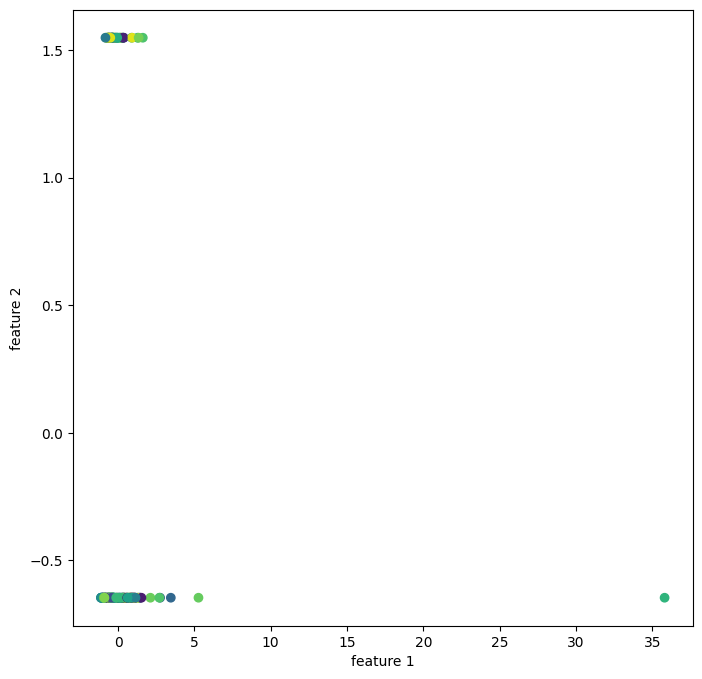

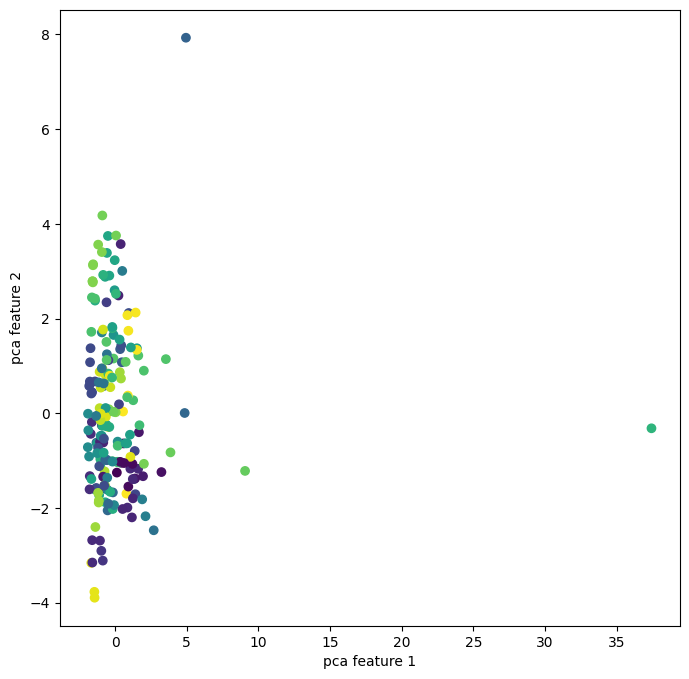

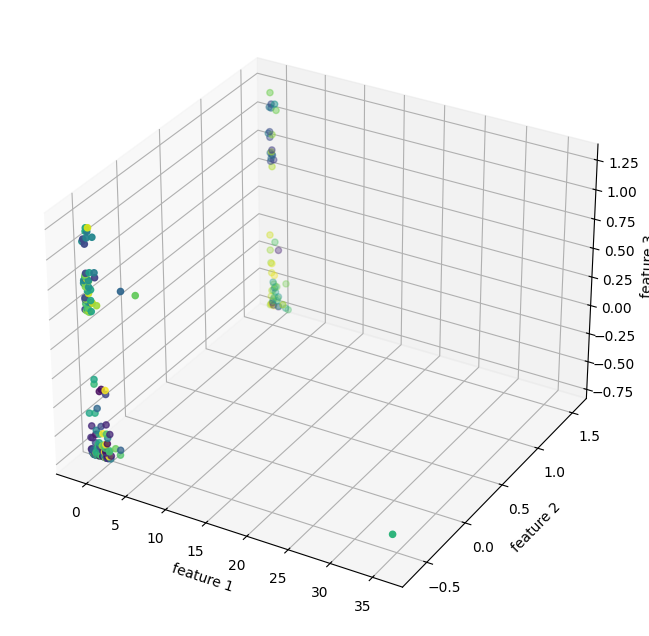

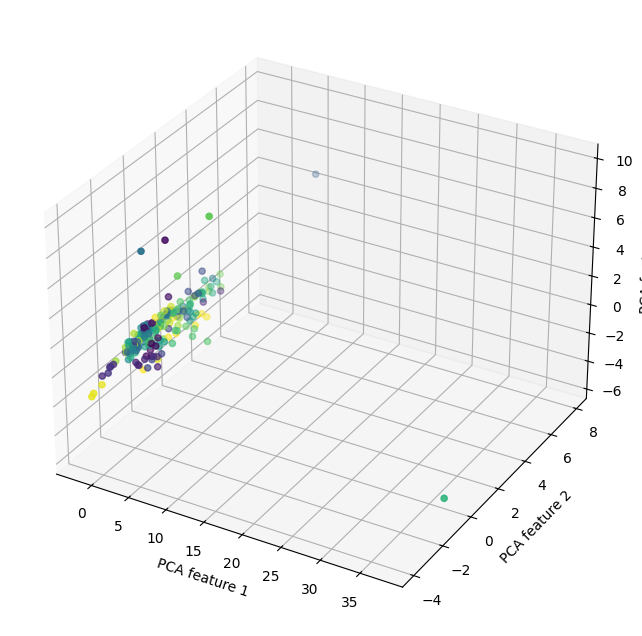

In [18]:
datax = sampled['length']
datay = sampled['extension']
dataz = sampled['hostname']
pcaData = pd.DataFrame(PCA(n_components=3).fit_transform(sampled))
labels_ = clusters.predict(sampled)

#non-pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(datax, datay, c=labels_)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

#pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(pcaData[0], pcaData[1], c=labels_)
plt.xlabel('pca feature 1')
plt.ylabel('pca feature 2')
plt.show()

#non-pca cluster plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(datax, datay, dataz, c=labels_)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

#pca plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pcaData[0], pcaData[1], pcaData[2],c=labels_)
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.show()

In [19]:
i = 0
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))
def error(prediction, point):
    global i
    closest_center = clusters.cluster_centers_[prediction[i]]
    i += 1
    return euclidean_distance(closest_center, point)

In [21]:
predictions = clusters.predict(normalizedTestFeatures)
ordered = normalizedTestFeatures.apply(lambda x : (error(predictions, x), x), axis=1).sort_values(key=0, ascending=False)
predictions

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

array([ 98, 148, 141, ...,  62, 139, 120])

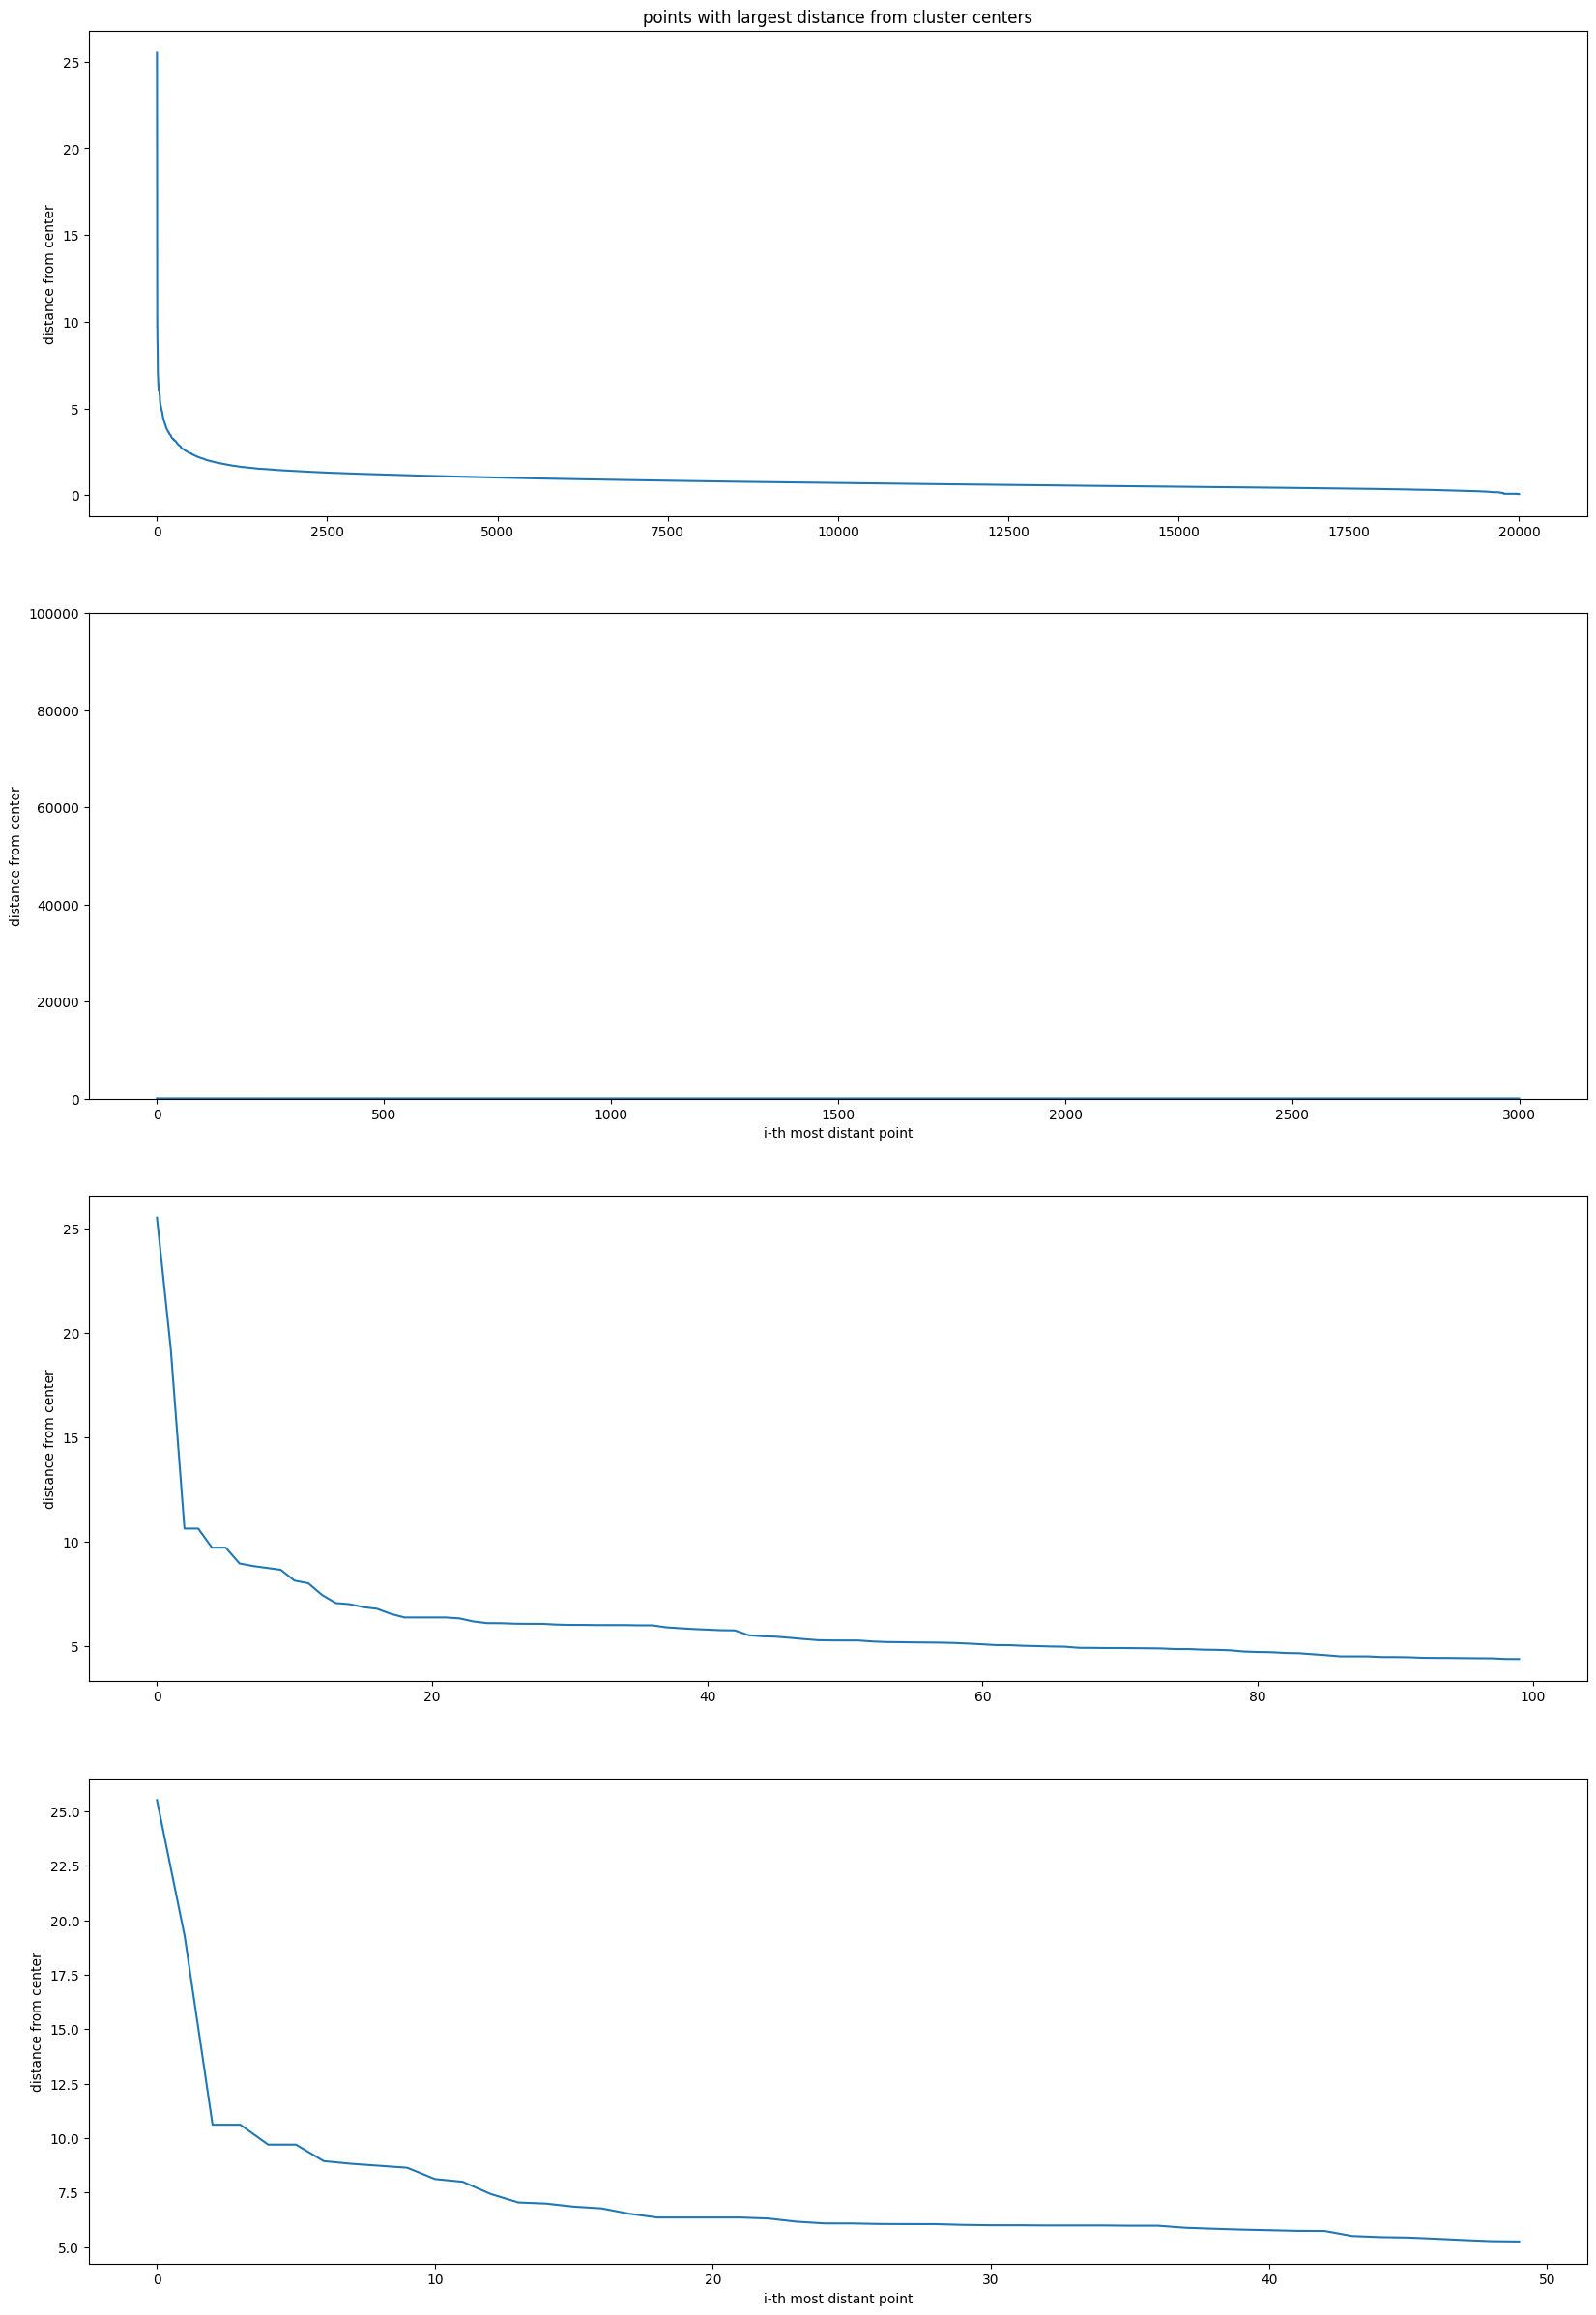

In [22]:
xx = [x[0] for x in ordered]
plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
plt.plot(xx)
plt.title("points with largest distance from cluster centers")
plt.ylabel("distance from center")

plt.subplot(4,1,2)
plt.plot(xx[:3000])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.ylim(0,100000)

plt.subplot(4,1,3)
plt.plot(xx[:100])
plt.ylabel("distance from center")

plt.subplot(4,1,4)
plt.plot(xx[:50])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.show()

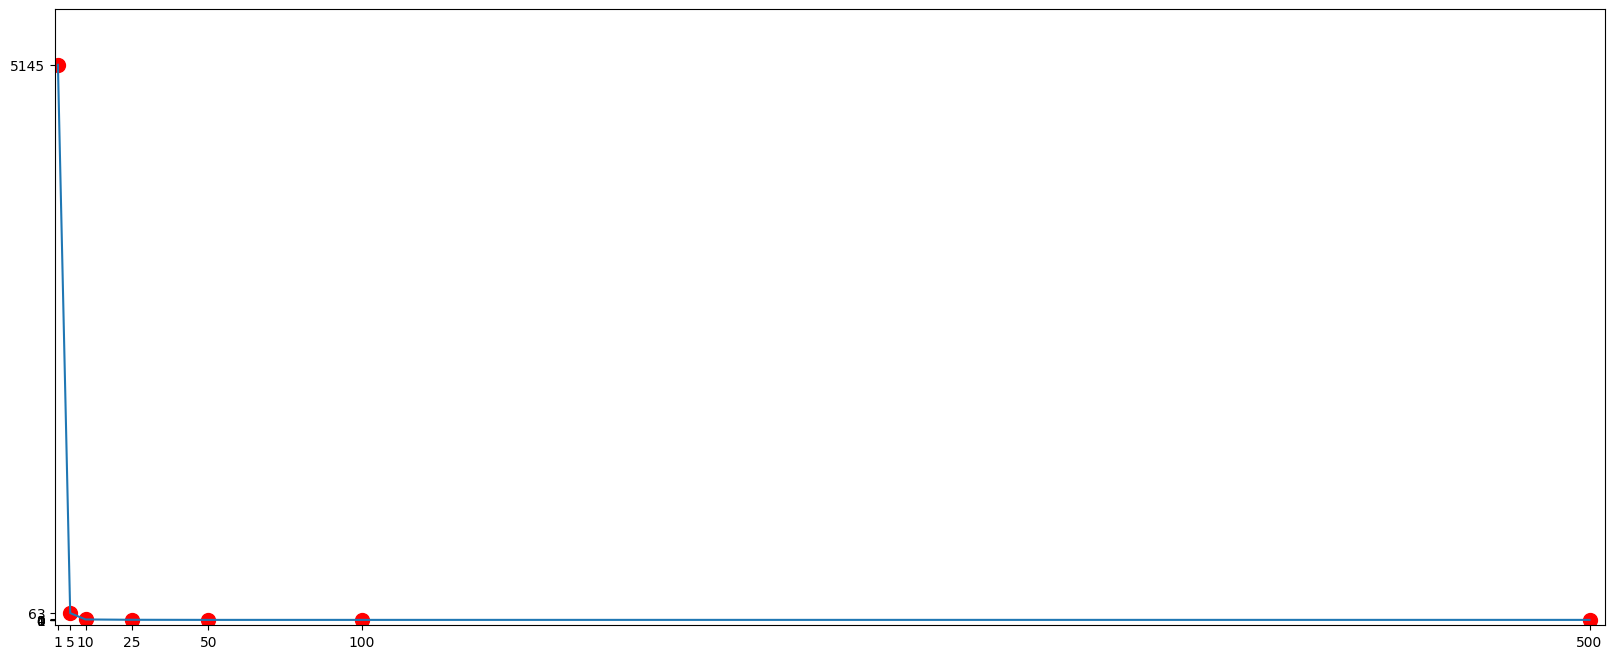

Threshold:        500	anomalous connections:     0
Threshold:        100	anomalous connections:     0
Threshold:         50	anomalous connections:     0
Threshold:         25	anomalous connections:     1
Threshold:         10	anomalous connections:     4
Threshold:          5	anomalous connections:    63
Threshold:          1	anomalous connections:  5145


In [23]:
thresholds = [500, 100, 50, 25, 10, 5, 1]
t_count = [len([__ for __ in xx if __ > _]) for _ in thresholds]

plt.figure(figsize=(20,8))
plt.scatter(thresholds, t_count, c="r", s=100)
plt.plot(thresholds, t_count)
plt.yticks(t_count)
plt.xticks(thresholds)
plt.ylim(-50, np.max(t_count)*1.1)
plt.xlim(0, np.max(thresholds)*1.01)
plt.show()

for i in range(len(thresholds)):
    print("Threshold: %10d\tanomalous connections: %5d" %(thresholds[i], t_count[i]))

In [25]:
homogeneity = m.homogeneity_score(test_labels,predictions)
completeness = m.completeness_score(test_labels,predictions)
v_measure = m.v_measure_score(test_labels,predictions)
print("Homogeneity score: " + str(homogeneity))
print("Completeness score: " + str(completeness))
print("V-Measure score: " + str(v_measure))

Homogeneity score: 0.13328236819493372
Completeness score: 0.018943079884392602
V-Measure score: 0.03317156992807101


In [28]:
import pickle
with open('trained_models/kmeans.pkl','wb') as f:
    pickle.dump(kmeans,f)
print("Model dump complete!")

Model dump complete!
